This tool creates ML models with the given datasets.

In [1]:
import pandas as pd
import csv
import os

In [2]:
import re

def split_number(s):
    return list(filter(None, re.split(r'(\d+)', s)))

Our labels, separated by category.

In [3]:
basic_stats = [
    'up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var', 'up_bytes_skew', 'up_bytes_kurt',
    'up_bytes_perc25', 'up_bytes_perc50', 'up_bytes_perc75', 'up_bytes_perc90',
    'up_packet_mean', 'up_packet_median', 'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
    'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75', 'up_packet_perc90',
    'down_bytes_mean', 'down_bytes_median', 'down_bytes_std', 'down_bytes_var', 'down_bytes_skew', 'down_bytes_kurt',
    'down_bytes_perc25', 'down_bytes_perc50', 'down_bytes_perc75', 'down_bytes_perc90',
    'down_packet_mean', 'down_packet_median', 'down_packet_std', 'down_packet_var', 'down_packet_skew', 'down_packet_kurt',
    'down_packet_perc25', 'down_packet_perc50', 'down_packet_perc75', 'down_packet_perc90']

silences = ['down_bytes_silences', 'down_bytes_silence_mean', 'down_bytes_longest_silence', 'down_bytes_shortest_silence',
           'up_bytes_silences', 'up_bytes_silence_mean', 'up_bytes_longest_silence', 'up_bytes_shortest_silence']


scalogram_1 = ['up_bytes_1max_y', 'up_bytes_1max_x', 'up_bytes_1min_y', 'up_bytes_1min_x',  
    'up_packet_1max_y', 'up_packet_1max_x', 'up_packet_1min_y', 'up_packet_1min_x', 'down_bytes_1max_y',
    'down_bytes_1max_x',    'down_bytes_1min_y', 'down_bytes_1min_x', 'down_packet_1max_y',
    'down_packet_1max_x', 'down_packet_1min_y', 'down_packet_1min_x']

scalogram_2 = ['up_bytes_2max_y', 'up_bytes_2max_x', 'up_bytes_2min_y', 'up_bytes_2min_x',  
    'up_packet_2max_y', 'up_packet_2max_x', 'up_packet_2min_y', 'up_packet_2min_x', 'down_bytes_2max_y',
    'down_bytes_2max_x',    'down_bytes_2min_y', 'down_bytes_2min_x', 'down_packet_2max_y',
    'down_packet_2max_x','down_packet_2min_y','down_packet_2min_x']

scalogram_3 = ['up_bytes_3max_y', 'up_bytes_3max_x', 'up_bytes_3min_y', 'up_bytes_3min_x',  
    'up_packet_3max_y', 'up_packet_3max_x', 'up_packet_3min_y', 'up_packet_3min_x', 'up_packet_3min_y',
    'down_bytes_3max_y', 'down_packet_3min_y', 'down_bytes_3max_x', 'down_bytes_3min_y',
    'down_bytes_3min_x', 'down_packet_3max_y','down_packet_3max_x','down_packet_3min_y','down_packet_3min_x']
scalogram_4 = ['up_bytes_4max_y', 'up_bytes_4max_x', 'up_bytes_4min_y', 'up_bytes_4min_x',  
    'up_packet_4max_y', 'up_packet_4max_x', 'up_packet_4min_y', 'up_packet_4min_x', 'down_bytes_4max_y',
    'down_bytes_4max_x',    'down_bytes_4min_y', 'down_bytes_4min_x', 'down_packet_4max_y',
    'down_packet_4max_x','down_packet_4min_y','down_packet_4min_x']
scalogram_5 = ['up_bytes_5max_y', 'up_bytes_5max_x', 'up_bytes_5min_y', 'up_bytes_5min_x',  
    'up_packet_5max_y', 'up_packet_5max_x', 'up_packet_5min_y', 'up_packet_5min_x', 'down_bytes_5max_y',
    'down_bytes_5max_x',    'down_bytes_5min_y', 'down_bytes_5min_x', 'down_packet_5max_y',
    'down_packet_5max_x','down_packet_5min_y','down_packet_5min_x']

scalogram = scalogram_1 + scalogram_2 + scalogram_3 + scalogram_4 + scalogram_5

Load the dataset.

In [4]:
base_folder = "csv/"
file_name = 'all_60s_1s.csv'

dataset = pd.read_csv(os.path.join(str(base_folder), str(file_name)))

dataset = dataset.drop(columns=['Unnamed: 0']).reset_index()
dataset.drop(columns=['index', 'up_packet_silence_mean', 'down_packet_silence_mean',
                      'down_packet_longest_silence', 'down_packet_shortest_silence'] + scalogram, inplace=True)
features = dataset.columns
print(features)
print(len(features))

Index(['up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var',
       'up_bytes_skew', 'up_bytes_kurt', 'up_bytes_perc25', 'up_bytes_perc50',
       'up_bytes_perc75', 'up_bytes_perc90', 'up_bytes_silences',
       'up_bytes_silence_mean', 'up_bytes_longest_silence',
       'up_bytes_shortest_silence', 'up_packet_mean', 'up_packet_median',
       'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
       'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75',
       'up_packet_perc90', 'up_packet_silences', 'up_packet_longest_silence',
       'up_packet_shortest_silence', 'down_bytes_mean', 'down_bytes_median',
       'down_bytes_std', 'down_bytes_var', 'down_bytes_skew',
       'down_bytes_kurt', 'down_bytes_perc25', 'down_bytes_perc50',
       'down_bytes_perc75', 'down_bytes_perc90', 'down_bytes_silences',
       'down_bytes_silence_mean', 'down_bytes_longest_silence',
       'down_bytes_shortest_silence', 'down_packet_mean', 'down_packet_median',
 

Choose the labels to consider.

In [5]:

dataset.loc[dataset['label'] == 'netflix-ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-ssh', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'twitch-ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'netflix-openvpn', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-openvpn', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'twitch-openvpn', 'label'] = 'twitch'
dataset.loc[dataset['label'] == 'acestream-openvpn', 'label'] = 'acestream'
dataset.loc[dataset['label'] == 'twitch-openvpn', 'label'] = 'twitch'
dataset.loc[dataset['label'] == 'netflix-openvpn', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-openvpn', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'browsing-openvpn', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'reddit', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'facebook', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'netflix_ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube_ssh_', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'acestream_openvpn', 'label'] = 'acestream'

dataset = dataset[dataset['label'] != 'browsing']
#dataset = dataset[dataset['label'] != 'netflix']

dataset['label'].value_counts()

netflix      291
youtube      255
acestream    126
twitch       100
Name: label, dtype: int64

In [6]:
dataset['label'].isna().any()

False

Factorize the labels.

In [7]:
prevlabel = dataset['label']
dataset['label'] = pd.factorize(dataset['label'])[0]
labels = dataset['label']
dataset['label'].value_counts()

0    291
1    255
2    126
3    100
Name: label, dtype: int64

Check correlation matrix.

In [8]:
dataset.corr()['label'].sort_values(ascending=False)

label                          1.000000
down_bytes_median              0.633530
down_bytes_perc50              0.633530
down_bytes_perc75              0.578637
down_bytes_mean                0.546916
down_bytes_perc25              0.520655
down_packet_perc50             0.509174
down_packet_median             0.509174
down_packet_perc25             0.492770
down_packet_mean               0.451152
down_packet_perc75             0.413960
up_packet_perc25               0.398378
up_packet_median               0.353329
up_packet_perc50               0.353329
up_packet_mean                 0.334504
up_packet_perc75               0.308167
down_bytes_perc90              0.295082
up_packet_perc90               0.270121
down_packet_perc90             0.261584
up_packet_std                  0.213385
up_packet_var                  0.166535
down_bytes_std                 0.152998
down_packet_std                0.120598
up_bytes_perc25                0.118641
down_packet_var                0.019119


Imputer for Nan values.

In [9]:
from sklearn.preprocessing import Imputer
labels = dataset['label']
imputer = Imputer(strategy="median")
imputer.fit(dataset)
dataset = pd.DataFrame(imputer.transform(dataset), columns=dataset.columns)

Normalize features (if needed)

In [10]:

from sklearn.preprocessing import StandardScaler
import numpy as np

labels = dataset['label']
dataset_no_label = dataset.loc[:, dataset.columns != 'label']
to_scale = dataset_no_label
scaler = StandardScaler()
scaled = scaler.fit_transform(to_scale)

dataset = pd.DataFrame(scaled)
#joblib.dump(scaler, '../models/std_scaler_' + sampling_interval + '_' + str(sample_size) + '.sav')
dataset['label'] = labels


Apply PCA

In [11]:
#PCA
'''
from sklearn.decomposition import PCA

labels = dataset['label']
dataset_no_label = dataset.loc[:, dataset.columns != 'label']

pca = PCA(n_components=40)
main_components = pca.fit_transform(dataset_no_label)
dataset = pd.DataFrame(data = main_components)
dataset['label'] = labels

dataset['label'].isna().any()
'''

"\nfrom sklearn.decomposition import PCA\n\nlabels = dataset['label']\ndataset_no_label = dataset.loc[:, dataset.columns != 'label']\n\npca = PCA(n_components=40)\nmain_components = pca.fit_transform(dataset_no_label)\ndataset = pd.DataFrame(data = main_components)\ndataset['label'] = labels\n\ndataset['label'].isna().any()\n"

Split training and testing set randomly.

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

y_train = train['label']
x_train = train.drop(columns=['label'])

y_test = test['label']
x_test = test.drop(columns=['label'])

In [13]:
y_train_youtube = (y_train == 0)
y_train_netflix = (y_train == 1)
y_train_twitch = (y_train == 2)
y_train_acestream = (y_train == 3)

In [14]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score

import matplotlib.pyplot as plt

def do_test_forest(model):
    
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas_a = cross_val_predict(model, x_train, y_train_acestream, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]
    y_scores_a = y_probas_a[:, 1]


    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)
    fpr_a, tpr_a, thresholds_a = roc_curve(y_train_acestream, y_scores_a)
    

    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    plot_roc_curve(fpr_t, tpr_t, "Acestream")
   
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    cv_ac = cross_val_score(model, x_train, y_train_acestream, cv=10, scoring="accuracy")
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    
    
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    print("Acestream: ")
    print("\tCrossValScore: " + str(sum(cv_ac)/len(cv_ac)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_acestream, y_scores_a)))
    
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)
    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [16]:
def do_test_forest_ovo(model):

    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))    
  
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [17]:
from sklearn.decomposition import PCA

def do_test_svm(model):    
    
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas_a = cross_val_predict(model, x_train, y_train_acestream, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]
    y_scores_a = y_probas_a[:, 1]

    
    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)
    fpr_a, tpr_a, thresholds_a = roc_curve(y_train_acestream, y_scores_a)
    

    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    plot_roc_curve(fpr_t, tpr_t, "Acestream")
   
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    cv_ac = cross_val_score(model, x_train, y_train_acestream, cv=10, scoring="accuracy")
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    print("Acestream: ")
    print("\tCrossValScore: " + str(sum(cv_ac)/len(cv_ac)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_acestream, y_scores_a)))
    
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)
    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [18]:
from sklearn.decomposition import PCA

def do_test_knn(model):    
    
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas_a = cross_val_predict(model, x_train, y_train_acestream, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]
    y_scores_a = y_probas_a[:, 1]

    
    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)
    fpr_a, tpr_a, thresholds_a = roc_curve(y_train_acestream, y_scores_a)
    

    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    plot_roc_curve(fpr_t, tpr_t, "Acestream")
   
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    cv_ac = cross_val_score(model, x_train, y_train_acestream, cv=10, scoring="accuracy")
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    print("Acestream: ")
    print("\tCrossValScore: " + str(sum(cv_ac)/len(cv_ac)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_acestream, y_scores_a)))
    
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)
    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

-----Random Forest------


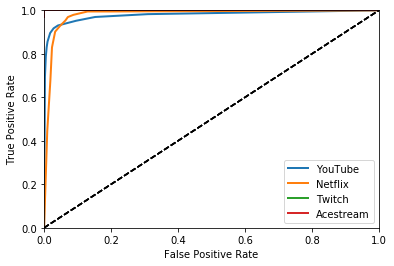

YouTube: 
	CrossValScore: 0.9496562665256476
	RocAucScore:  0.9786597011571734
Netflix: 
	CrossValScore: 0.9447315185548923
	RocAucScore:  0.9802222709658552
Twitch: 
	CrossValScore: 1.0
	RocAucScore:  1.0
Acestream: 
	CrossValScore: 0.9919354838709676
	RocAucScore:  0.9924815260354014
Multiclass: 
	CrossValScore: 0.9349643675555891
[[57  4  0  0]
 [ 4 56  0  1]
 [ 0  1 20  0]
 [ 0  1  0 11]]

Accuracy train set: 0.993517017828201
Accuracy test set: 0.9290322580645162
-----OvO Classifier Random Forest------
	CrossValScore: 0.9448251533999814
[[55  6  0  0]
 [ 3 56  0  2]
 [ 0  2 19  0]
 [ 0  0  0 12]]

Accuracy train set: 0.9983792544570502
Accuracy test set: 0.9161290322580645
-----OvR Classifier Random Forest------
	CrossValScore: 0.9431610888670644
[[55  6  0  0]
 [ 0 60  0  1]
 [ 0  1 20  0]
 [ 0  0  0 12]]

Accuracy train set: 0.9983792544570502
Accuracy test set: 0.9483870967741935
----------SVM-----------


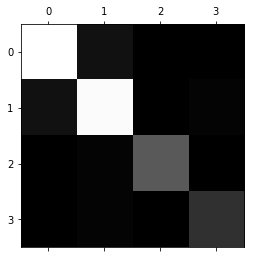

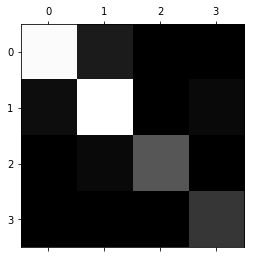

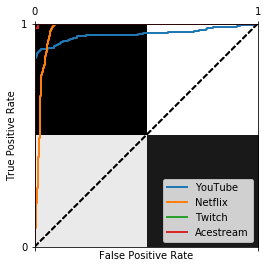

YouTube: 
	CrossValScore: 0.9414595452141725
	RocAucScore:  0.9518481069542749
Netflix: 
	CrossValScore: 0.9349995383311089
	RocAucScore:  0.9742999195730058
Twitch: 
	CrossValScore: 0.9967477525118985
	RocAucScore:  0.9997395833333333
Acestream: 
	CrossValScore: 0.9870430107526881
	RocAucScore:  0.9902474652002062
Multiclass: 
	CrossValScore: 0.9266796353655158
[[54  7  0  0]
 [ 2 58  0  1]
 [ 1  1 19  0]
 [ 1  0  0 11]]

Accuracy train set: 0.9497568881685575
Accuracy test set: 0.9161290322580645
----------Knn-----------


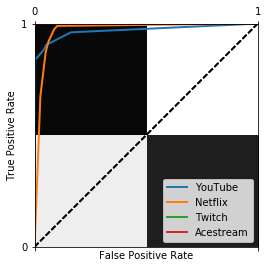

YouTube: 
	CrossValScore: 0.9302221047065045
	RocAucScore:  0.9681103246826198
Netflix: 
	CrossValScore: 0.9316688071315253
	RocAucScore:  0.9698703419365845
Twitch: 
	CrossValScore: 0.9983870967741936
	RocAucScore:  1.0
Acestream: 
	CrossValScore: 0.9903225806451612
	RocAucScore:  0.9756508850317924
Multiclass: 
	CrossValScore: 0.9251478179849411
[[54  7  0  0]
 [ 0 61  0  0]
 [ 0  1 20  0]
 [ 0  1  0 11]]

Accuracy train set: 0.9529983792544571
Accuracy test set: 0.9419354838709677
-----Neural Network-----


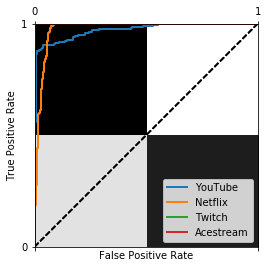

YouTube: 
	CrossValScore: 0.9382866208355368
	RocAucScore:  0.971812155937535
Netflix: 
	CrossValScore: 0.9332825497553155
	RocAucScore:  0.9769198898393897
Twitch: 
	CrossValScore: 0.9983606557377049
	RocAucScore:  1.0
Acestream: 
	CrossValScore: 0.9887096774193548
	RocAucScore:  0.98509194019591
Multiclass: 
	CrossValScore: 0.9316249905567726
[[56  5  0  0]
 [ 2 58  0  1]
 [ 0  1 20  0]
 [ 1  0  0 11]]

Accuracy train set: 0.9611021069692058
Accuracy test set: 0.9354838709677419
--------AdaBoost Random Forest--------


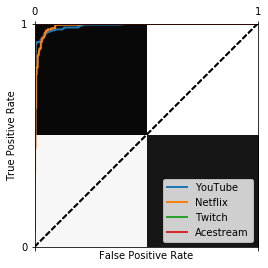

YouTube: 
	CrossValScore: 0.9561607615018509
	RocAucScore:  0.9910965060105607
Netflix: 
	CrossValScore: 0.9529546809028565
	RocAucScore:  0.9898369525480735
Twitch: 
	CrossValScore: 1.0
	RocAucScore:  1.0
Acestream: 
	CrossValScore: 0.9919354838709676
	RocAucScore:  0.9930507819212924
Multiclass: 
	CrossValScore: 0.9512264443940804
[[54  7  0  0]
 [ 0 60  0  1]
 [ 1  1 19  0]
 [ 0  0  0 12]]

Accuracy train set: 0.9983792544570502
Accuracy test set: 0.9354838709677419
---------Decision Tree------


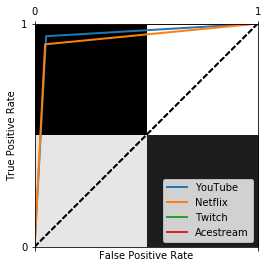

YouTube: 
	CrossValScore: 0.9464569011105235
	RocAucScore:  0.9458993371531289
Netflix: 
	CrossValScore: 0.9382270235786893
	RocAucScore:  0.9299675854841462
Twitch: 
	CrossValScore: 1.0
	RocAucScore:  1.0
Acestream: 
	CrossValScore: 0.9773929138022209
	RocAucScore:  0.9630842928338202
Multiclass: 
	CrossValScore: 0.9255429226158999
[[58  3  0  0]
 [ 4 55  0  2]
 [ 0  2 19  0]
 [ 1  0  0 11]]

Accuracy train set: 1.0
Accuracy test set: 0.9225806451612903
--------AdaBoost Decision Tree--------


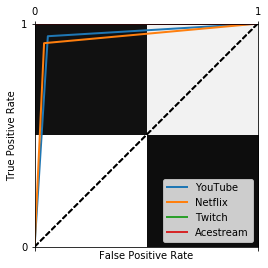

YouTube: 
	CrossValScore: 0.9529878371232152
	RocAucScore:  0.9420233681608808
Netflix: 
	CrossValScore: 0.9414801104647748
	RocAucScore:  0.9349089712656284
Twitch: 
	CrossValScore: 1.0
	RocAucScore:  1.0
Acestream: 
	CrossValScore: 0.9854574299312535
	RocAucScore:  0.9668650111703043
Multiclass: 
	CrossValScore: 0.9352527847028111
[[57  4  0  0]
 [ 4 55  0  2]
 [ 0  2 19  0]
 [ 1  0  0 11]]

Accuracy train set: 1.0
Accuracy test set: 0.9161290322580645


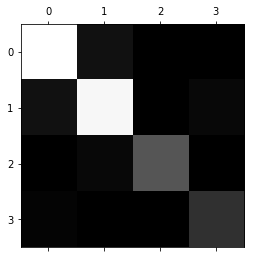

In [19]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier

print("-----Random Forest------")
rf = RandomForestClassifier(random_state=14)

do_test_forest(rf)

print("-----OvO Classifier Random Forest------")

rf = OneVsOneClassifier(rf)
do_test_forest_ovo(rf)

print("-----OvR Classifier Random Forest------")

rf = OneVsRestClassifier(rf)
do_test_forest_ovo(rf)

print("----------SVM-----------")
svm = SVC(random_state=42, probability=True)
do_test_svm(svm)


print("----------Knn-----------")
knn = KNeighborsClassifier()
do_test_knn(knn)

print("-----Neural Network-----")
nn = MLPClassifier(max_iter=1000)
do_test_knn(nn)


print("--------AdaBoost Random Forest--------")

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9,
                            max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False,
                            random_state=42, verbose=0, warm_start=False)

ada_clf = AdaBoostClassifier(
    rf,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)

print("---------Decision Tree------")
dt = DecisionTreeClassifier(random_state=42)

do_test_forest(dt)

print("--------AdaBoost Decision Tree--------")

dt = DecisionTreeClassifier(random_state=42)

ada_clf = AdaBoostClassifier(
    dt,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)



In [20]:
import operator
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predictions = rf.predict_proba(x_test)
dec = []
for p in predictions:
    index, value = max(enumerate(p), key=operator.itemgetter(1))
    dec.append(index)

In [21]:
i = 0
for i in range(0, len(predictions)):
    if(dec[i] != y_test.values[i]):
        print("Predicted: -> "+ str(dec[i]) + "\nReal: " +  str(y_test.values[i]) + "\n\t" + str(predictions[i]))

Predicted: -> 1
Real: 0.0
	[0.2 0.8 0.  0. ]
Predicted: -> 0
Real: 1.0
	[0.5 0.3 0.  0.2]
Predicted: -> 0
Real: 2.0
	[0.6 0.2 0.2 0. ]
Predicted: -> 1
Real: 0.0
	[0.1 0.9 0.  0. ]
Predicted: -> 0
Real: 3.0
	[0.5 0.2 0.  0.3]
Predicted: -> 0
Real: 1.0
	[0.5 0.3 0.  0.2]
Predicted: -> 3
Real: 1.0
	[0.4 0.1 0.  0.5]
Predicted: -> 3
Real: 1.0
	[0.  0.2 0.  0.8]
Predicted: -> 1
Real: 2.0
	[0. 1. 0. 0.]
Predicted: -> 0
Real: 1.0
	[0.7 0.3 0.  0. ]
Predicted: -> 1
Real: 0.0
	[0.4 0.5 0.  0.1]
Predicted: -> 1
Real: 0.0
	[0.3 0.7 0.  0. ]


In [22]:
print("-----OvR Classifier Random Forest------")

rf = OneVsRestClassifier(rf)
rf.fit(x_train, y_train)

-----OvR Classifier Random Forest------


OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          n_jobs=1)

In [23]:
predictions = rf.predict(x_test)

In [24]:
nosil = x_test.loc[x_test['down_packet_silences'] == 30]


KeyError: 'down_packet_silences'

In [ ]:
nosil

In [ ]:
for entry, labels in zip(x_test, predictions):
    print('%s has labels -> %s' % (entry, ', '.join(y_train[x] for x in labels)))

In [ ]:
# 5
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.externals import joblib
nn = RandomForestClassifier(random_state=14)
model = OneVsRestClassifier(nn)

cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))    


model.fit(x_train, y_train)
predictions = model.predict(x_test)
conf_mx = confusion_matrix(y_test, predictions)
plt.matshow(conf_mx, cmap=plt.cm.gray)

print(conf_mx)    
print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

joblib.dump(model, '../models/vidVsvid_best.sav')


In [ ]:
rf = RandomForestClassifier()
ovr = OneVsRestClassifier(rf)

param_grid = {
    "random_state": list(range(0,100))
}

clf_grid = RandomForestClassifier(ovr, param_grid, n_jobs=8)
clf_grid.fit(x_train, y_train)

print("-----------------Original Features--------------------")
print("Best score: %0.4f" % clf_grid.best_score_)
print("Using the following parameters:")
print(clf_grid.best_params_)

In [ ]:
def save_fig(fig_id, tight_layout=True, fig_extension="pdf", resolution=300):
    path = os.path.join(os.getcwd(), fig_id + "." + fig_extension)
    print(f"Saving figure {fig_id} to {path}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
save_fig('roc_vv')